In [20]:
from flickplay.mongo import get_mongo_db_obj
import datetime

db = get_mongo_db_obj()


START = datetime.datetime(2022,3,1)
DELTA = datetime.timedelta(days=31)
                           
def get_total_reg(start=START, 
                  delta=DELTA):
    
    end = START+DELTA
    reg = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'anonymous': False, 'createdThroughConnectWallet': False, 'appleId': None})))
    wallet_con = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'createdThroughConnectWallet': True })))
    apple = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'appleId': {'$ne': None}})))
    return reg+wallet_con+apple



START = datetime.datetime(2022,3,1)
DELTA = datetime.timedelta(days=31)
                           
def get_users_by_registration_type(start=START, 
                                   delta=DELTA,
                                   kind='all'):
    
    if kind not in ('total','regular','apple','wallet_connect'):
        raise ValueError(f"kind: expected ('total','regular','apple','wallet_connect'), got {kind}")
    
    end = START+DELTA
    reg = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'anonymous': False, 'createdThroughConnectWallet': False, 'appleId': None})))

    wallet_con = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'createdThroughConnectWallet': True })))

    apple = len(list(db.users.find({'created': {'$gt': start, '$lte': end}, 'appleId': {'$ne': None}})))
    
    return reg+wallet_con+apple


NameError: name 'users' is not defined

In [5]:
from flickplay.mongo import get_mongo_db_obj
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
from flickplay.utils import timer_func
import pandas as pd

In [15]:
db = get_mongo_db_obj()

def process_reg_type(user):
    if user.anonymous:
        return 'anonymous'
    elif user.createdThroughConnectWallet:
        return 'wallet connect'
    elif not np.isnan(user.appleId):
        return 'apple'
    else:
        return 'regular'

def get_registration_filter(kind='apple'):
    if kind not in ('apple', 'walletConnect', 'regular', 'anonymous'):
        raise ValueError(f"kind must be one of 'apple', 'walletConnect', 'regular', 'anonymous'")
    if kind == 'apple':
        return {'appleId': {'$ne': None}}
    elif kind == 'walletConnect':
        return {'createdThroughConnectWallet': True}
    elif kind == 'anonymous':
        return {'anonymous': True}
    else:
        return  {'anonymous': False, 'createdThroughConnectWallet': False, 'appleId': None}
    
@timer_func
def get_users_by_reg_type(kind='apple'):
    reg_filter = get_registration_filter(kind=kind)
    return pd.DataFrame.from_records(db.users.find(reg_filter))

# dr = get_process_recordings()
# users = get_process_users()

apple = get_users_by_reg_type('apple')
regular = get_users_by_reg_type('regular')
walletConnect = get_users_by_reg_type('walletConnect')
anonymous = get_users_by_reg_type('anonymous')

users_by_reg_type = {
    # 'all': users,
    'apple': apple,
    'regular': regular,
    'walletConnect': walletConnect,
    'anonymous': anonymous
}

for k, v in users_by_reg_type.items():
    users_by_reg_type[k]['reg_type'] = [k]*len(v)
    
users = pd.concat(list([ v for k,v in users_by_reg_type.items() ]))

@timer_func
def get_users():
    return pd.DataFrame.from_records(db.users.find())

users_fetched = get_users()


Function 'get_users_by_reg_type' executed in 1.7744s
Function 'get_users_by_reg_type' executed in 1.0178s
Function 'get_users_by_reg_type' executed in 1.0185s
Function 'get_users_by_reg_type' executed in 18.5581s
Function 'get_users' executed in 24.9726s


In [51]:
u = users_fetched.loc[users_fetched._id.apply(lambda x: x in users._id.values) ]

ObjectId('5f0f36814968371608cd1a86')

In [50]:
users_fetched.loc?

Type:        property
String form: <property object at 0x7fe0694768b0>
Docstring:  
Access a group of rows and columns by label(s) or a boolean array.

``.loc[]`` is primarily label based, but may also be used with a
boolean array.

Allowed inputs are:

- A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
  interpreted as a *label* of the index, and **never** as an
  integer position along the index).
- A list or array of labels, e.g. ``['a', 'b', 'c']``.
- A slice object with labels, e.g. ``'a':'f'``.

  .. warning:: Note that contrary to usual python slices, **both** the
      start and the stop are included

- A boolean array of the same length as the axis being sliced,
  e.g. ``[True, False, True]``.
- An alignable boolean Series. The index of the key will be aligned before
  masking.
- An alignable Index. The Index of the returned selection will be the input.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for i

In [30]:
# all_users = users_fetched.merge(users, on='_id', how='outer')
# all_users.to_csv('users_with_regtype.csv', index=False)

all_users['reg_type'].value_counts()


anonymous        49673
regular           2801
apple             2766
walletConnect      591
Name: reg_type, dtype: int64

In [37]:
all_

_id
profileImage_x
googleId_x
facebookId_x
appleId_x
email_x
name_x
age_x
gender_x
bio_x
countryCode_x
phone_x
phoneHash_x
role_x
isUser_x
isAdmin_x
loginCount_x
deleted_x
active_x
verified_x
followingCount_x
followersCount_x
likesCount_x
pointsCollected_x
flicksTotal_x
lastHomeFeedDate_x
pointsLastFlick_x
lastNotificationDate_x
lang_x
presaleCode_x
isValidPresaleCode_x
blockedUsers_x
username_x
salt_x
hashedPassword_x
created_x
updated_x
lastUsed_x
profilePoints_x
pushToken_x
allTimePoints_x
viewsCount_x
overrideViewsCount_x
device_x
ios_x
anonymous_x
wasAnonymous_x
allowMap_x
allowVideoMap_x
allowPinVideo_x
collectionsCount_x
collectionsSavedCount_x
tipsBalance_x
allTips_x
cameraPermission_x
locationPermission_x
notificationPermission_x
isMapCreator_x
allowAutopopulation_x
isCertified_x
pushTokens_x
allTimeLikes_x
isMapCreatorDelete_x
pushCounterFollowing_x
pushCounterWallet_x
spotCount_x
isBlocked_x
lastSyncDate_x
createdThroughConnectWallet_x
isExperienceCreator_x
nftCreator_x
flic

In [26]:
import os

os.getcwd()

'/Users/allen/Developer/clo/flickplay/mixpanel-events/data'

In [24]:
# sum(all_users['reg_type'].value_counts().values)

55831

start: 2022-01-01 00:00:00 registrations: 500
start: 2022-02-01 00:00:00 registrations: 244
start: 2022-03-01 00:00:00 registrations: 212
start: 2022-04-01 00:00:00 registrations: 264
start: 2022-05-01 00:00:00 registrations: 247
start: 2022-06-01 00:00:00 registrations: 476
start: 2022-07-01 00:00:00 registrations: 424
start: 2022-08-01 00:00:00 registrations: 142
start: 2022-09-01 00:00:00 registrations: 190
start: 2022-10-01 00:00:00 registrations: 129
start: 2022-11-01 00:00:00 registrations: 738
start: 2022-12-01 00:00:00 registrations: 157


<BarContainer object of 12 artists>

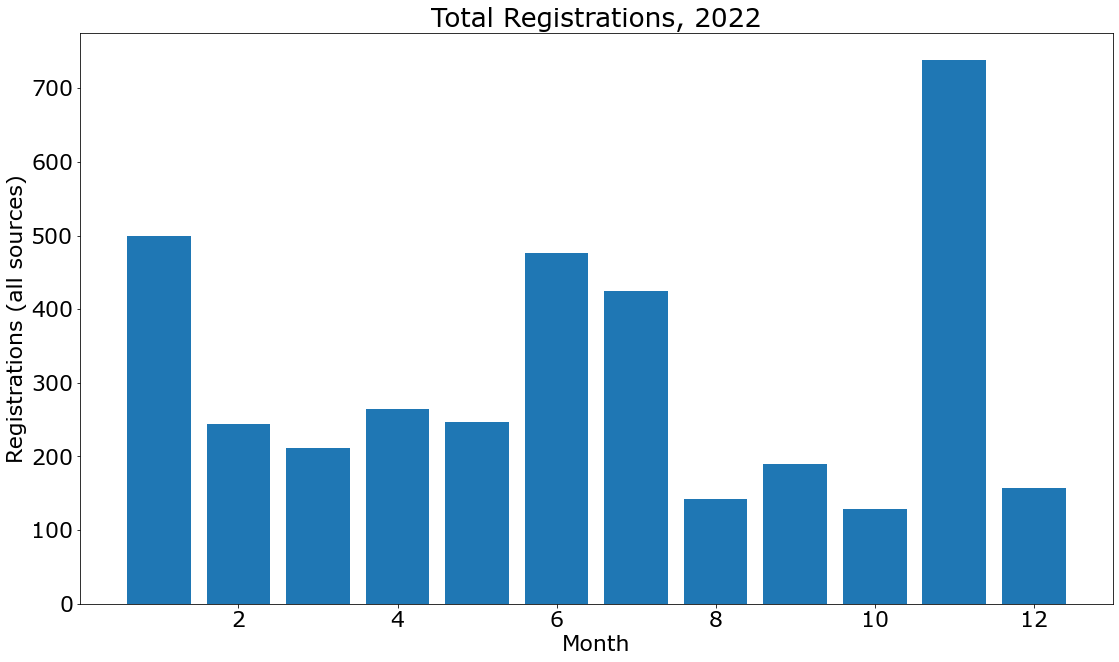

In [28]:
import matplotlib.pyplot as plt
import matplotlib


font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


months = list(range(1,13))
registrations = [ ]

for month in months:
    START = datetime.datetime(2022,month,1)
    reg = get_total_reg(start=START)
    print('start:', START, 'registrations:', reg)
    registrations.append(reg)


plt.title('Total Registrations, 2022')
plt.xlabel('Month')
plt.ylabel('Registrations (all sources)')
plt.bar(months, registrations)


In [25]:
registrations

[500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]